# Collaboration Project

## 1. Models tested

We tried and trained a Multi-DDPG algo (specifically 2 collaboring DDPG agents) with different sets of parameters:
- learning batch sizes for values [50, 100, 150, 200, 250, 300, 350, 400]
- number of steps between learning steps for values [1, 4, 8, 12, 16, 20]
- Ornstein-Uhlenbeck process (theta, sigma) for values [(0.15, 0.2), (0, 0)]
- Actor & Critic learning rates for values [(1e-4, 1e-3), (1e-3, 1e-3)]

### Notation

An agent will be composed of 2 identical DDPG models and will be identified by the following string: 
"[batch_size]_[nb_learning_steps]_[actor_lr]_[critic_lr]_[noise_theta]_[noise_sigma]_[actor_hidden_layers]_[critic_hidden_layer]"

For instance "150_8_0.001_0.001_0.15_0.1_(128, 128)_(128, 128)" designates 2 collaborative DDPG agents trained with:
- an actor neural network composed of 2 hidden layers fully connected of 128 nodes each
- a critic neural network composed of 2 hidden layers fully connected of 128 nodes each
- using a learning batch size of 150 steps at a time
- every 8 steps
- with an actor learning rate of 1e-3
- and a critic learning rate of 1e-3
- with noise parameters of (theta = 0.15, sigma = 0.1)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import results_analysis

## 2. Training results

Below we gather the results of all the training runs tried with different sets of parameters

In [3]:
# Get results from all training runs contained in the Results directory
df_results_step, df_results, df_details = results_analysis.get_training_results()

# Get best training runs
# best_results_step finds the highest step-values among all training runs
# best_results finds the highest end-of-episode values among all training runs
best_results_step, best_results = results_analysis.get_best_runs(df_results_step, df_results, nb_runs=5)

display(best_results_step.iloc[:5])
display(best_results.iloc[:5])

score
training   model_tag                                              
training_8 200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)    2.7
training_6 400_1_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)     2.7
training_5 350_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)    2.7
           400_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)    2.7
training_3 200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)    2.7

score
training   model_tag                                               
training_8 200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)  1.4172
training_5 350_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)  1.1695
           400_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)  0.9070
training_6 400_1_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)   0.8414
training_3 200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)  0.6077

## 3. Parameter analysis

In order to find the best model, I used the first training runs I had done and tried to keep the variation of each parameter that got the "best" results over all the runs (looking at max and mean values)

After running some more training passes with the most promising combinations of parameter values, I got the below summary table. 

In [4]:
# parameters_summary contains some statistics for each parameter values tried
parameters_summary = results_analysis.get_stats_per_parameter(df_details)
display(parameters_summary)

max  mean  count
tag_type    tag_value                    
batch_size  250         0.04  0.01      9
            300         0.05  0.01      9
            350         0.04  0.01      9
            400         0.10  0.02      9
            50          0.02  0.00     24
            100         0.02  0.00     24
            150         0.05  0.00     24
            200         0.06  0.01     25
learn_step  1           0.10  0.02     29
            4           0.02  0.00     28
            8           0.05  0.00     28
            12          0.02  0.00     16
            16          0.01  0.00     16
            20          0.01  0.00     16
actor_lr    0.001       0.06  0.01     24
            0.0001      0.10  0.01    109
critic_lr   0.001       0.10  0.01    133
noise_theta 0.15        0.01  0.00     12
            0.0         0.10  0.01    121
noise_sigma 0.1         0.01  0.00     12
            0.0         0.10  0.01    121
actor_nn    (128; 128)  0.10  0.01     61
            (32; 16)    0.02  0.00     24
            (32; 32)    0.05  0.00     24
            (64; 64)    0.03  0.00     24
critic_nn   (128; 128)  0.10  0.01     61
            (32; 16)    0.02  0.00     24
            (32; 32)    0.05  0.00     24
            (64; 64)    0.03  0.00     24

## 4. Best model

I selected as "best model" the one that reached an average score of 0.5 the fastest; in 1574 steps during training_3.
I then re-trained it by itself in training_8 and tried to maximize its score.

In [5]:
selected_model = best_results.index[0][1]

display(df_results[(df_results['model_tag']==selected_model)
                   & (df_results['training']=='training_3')])

display(df_results[(df_results['model_tag']==selected_model)
                   & (df_results['training']=='training_8')])

,model_id,model_tag,episode,score,training
360,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),100,0.0371,training_3
361,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),200,0.0160,training_3
362,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),300,0.0080,training_3
363,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),400,0.0440,training_3
364,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),500,0.0219,training_3
365,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),600,0.0282,training_3
366,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),700,0.0389,training_3
367,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),800,0.0544,training_3
368,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),900,0.0697,training_3
369,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),1000,0.0620,training_3


,model_id,model_tag,episode,score,training
0,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),100,0.0199,training_8
1,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),200,0.0300,training_8
2,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),300,0.0228,training_8
3,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),400,0.0338,training_8
4,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),500,0.0141,training_8
5,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),600,0.0162,training_8
6,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),700,0.0048,training_8
7,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),800,0.0009,training_8
8,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),900,0.0168,training_8
9,18,200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128),1000,0.0148,training_8


### 4.1 Training plots

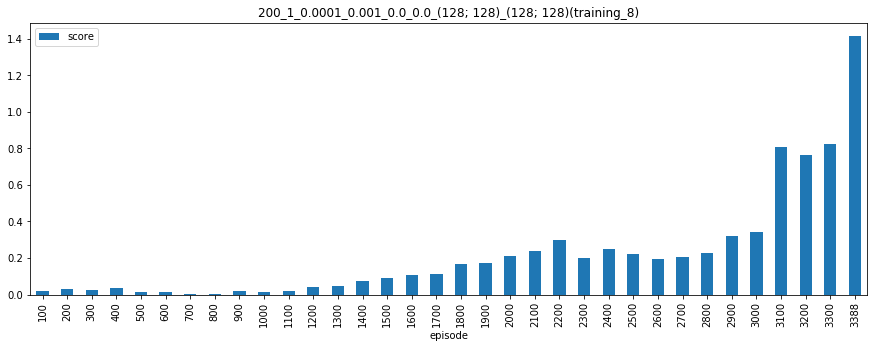

In [6]:
# Plot 100-steps average scores
training_run, selected_model = best_results.index[0]
results_analysis.plot_model(df_results_step, df_results, training_run, selected_model, by_step=False, kind='bar')

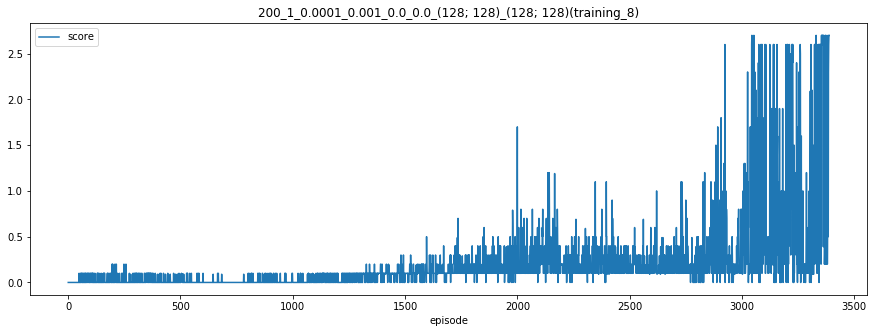

In [7]:
# Plot all steps
results_analysis.plot_model(df_results_step, df_results, training_run, selected_model, by_step=True, kind='line')

### 4.2 Test

Below a test run using the selected "best model"

In [8]:
import os 
import results_analysis

#You need to be at the root directory of the collaboration directory to run the model in the next cell
os.chdir('..')
print(os.getcwd())

try:
    selected_model = best_results.index[0][1]
except:
    selected_model = '200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)'

print('selected_model', selected_model)

/home/jrfalou/Programming/VSC/UdacityRL/Collaboration
selected_model 200_1_0.0001_0.001_0.0_0.0_(128; 128)_(128; 128)


In [9]:
#If you get the "handle is closed" error, you need to restart your kernel and execute from the Conclusion first cell; 
#I don't know how to fix that
%run -i collaboration.py test --test_params=best_params.json --test_model="auto" --test_results_path=""

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Load model weights ./ModelWeights/200_1_0.0001_0.001_0.0_0.0_(128, 128)_(128, 128).pth
Score: 2.6